This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

Import the count matrix from `computeMatrix`.

In [3]:
loop_interact = pd.read_csv('matrix_interacting_enhancers.tab', header=0, sep='\t')
loop_non_interact = pd.read_csv('matrix_neg_enhancers.tab', header=0, sep='\t')
enhancer_interact = pd.read_csv('matrix_chromHMM_inter_enhancers.tab', header=0, sep='\t')
enhancer_non_interact = pd.read_csv('matrix_chromHMM_inter_enhancers_no_interact.tab', header=0, sep='\t')

Aggregate the RPKM values for all the bins (columns) for each region.

In [8]:
loop_interact_CTRL = loop_interact.filter(regex = 'CTRL').sum(axis=1)
loop_interact_KD = loop_interact.filter(regex = 'KD').sum(axis=1)
loop_interact_plot = pd.DataFrame({'CTRL': loop_interact_CTRL,'KD': loop_interact_KD})

In [9]:
loop_non_interact_CTRL = loop_non_interact.filter(regex = 'CTRL').sum(axis=1)
loop_non_interact_KD = loop_non_interact.filter(regex = 'KD').sum(axis=1)
loop_non_interact_plot = pd.DataFrame({'CTRL': loop_non_interact_CTRL,'KD': loop_non_interact_KD})

In [10]:
enhancer_interact_CTRL = enhancer_interact.filter(regex = 'CTRL').sum(axis=1)
enhancer_interact_KD = enhancer_interact.filter(regex = 'KD').sum(axis=1)
enhancer_interact_plot = pd.DataFrame({'CTRL': enhancer_interact_CTRL,'KD': enhancer_interact_KD})

In [11]:
enhancer_non_interact_CTRL = enhancer_non_interact.filter(regex = 'CTRL').sum(axis=1)
enhancer_non_interact_KD = enhancer_non_interact.filter(regex = 'KD').sum(axis=1)
enhancer_non_interact_plot = pd.DataFrame({'CTRL': enhancer_non_interact_CTRL,'KD': enhancer_non_interact_KD})

# Randomly sample 272 rows to size match with the interacting loops. This is because the variance of the interact loops are drastically higher than the non-interaction loops. t test has to assume equal variance
# non_interact_plot_sample_1 = non_interact_plot_1.sample(n = 272)

Perform statistical test

In [12]:
scipy.stats.ttest_ind(loop_interact_plot['CTRL'], loop_interact_plot['KD'])

Ttest_indResult(statistic=0.9596889699365242, pvalue=0.3381540581206284)

In [13]:
scipy.stats.ttest_ind(loop_non_interact_plot['CTRL'], loop_non_interact_plot['KD'])

Ttest_indResult(statistic=1.921828581849175, pvalue=0.05468636848067759)

In [14]:
scipy.stats.ttest_ind(enhancer_interact_plot['CTRL'], enhancer_interact_plot['KD'])

Ttest_indResult(statistic=3.085630541725697, pvalue=0.002077933505753582)

In [15]:
scipy.stats.ttest_ind(enhancer_non_interact_plot['CTRL'], enhancer_non_interact_plot['KD'])

Ttest_indResult(statistic=43.58505917269079, pvalue=0.0)

Plot

In [16]:
loop_interact_plot['sample']='loop_interact'
loop_non_interact_plot['sample']='loop_non_interact'
enhancer_interact_plot['sample']='enhancer_interact'
enhancer_non_interact_plot['sample']='enhancer_non_interact'

In [17]:
loop_interact_plot = pd.melt(loop_interact_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loop_non_interact_plot = pd.melt(loop_non_interact_plot,id_vars='sample',var_name="condition",value_name="RPKM")
enhancer_interact_plot = pd.melt(enhancer_interact_plot,id_vars='sample',var_name="condition",value_name="RPKM")
enhancer_non_interact_plot = pd.melt(enhancer_non_interact_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [18]:
final_plot=loop_interact_plot.append(loop_non_interact_plot)
final_plot=final_plot.append(enhancer_interact_plot)
final_plot=final_plot.append(enhancer_non_interact_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


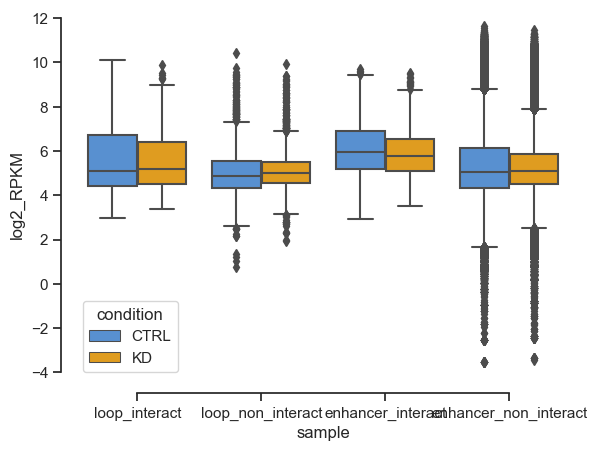

In [19]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=final_plot
).set_title("Cux1 & Smaca4 HiC & long loops")
sns.despine(offset=10, trim=True)